###Rossman Store Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Libraries are imported.

In [2]:
Store= pd.read_csv("C:/NextHikes Solutions/Rossmann Store Sales/store.csv")

- Dataset is loaded.

In [3]:
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Output shows the first 5 rows of the store dataset.

In [4]:
Train= pd.read_csv("C:/NextHikes Solutions/Rossmann Store Sales/train.csv")

C:\Users\ALANKAR\AppData\Local\Temp\ipykernel_24364\1761120280.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Train= pd.read_csv("C:/NextHikes Solutions/Rossmann Store Sales/train.csv")


- Train dataset is loaded.

In [5]:
Train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


- Output shows the first 5 rows of the train dataset.

In [6]:
store_train= pd.merge(Train, Store, on= 'Store', how= 'left')

- Training data is joined with the store-level data using the Store column.

In [7]:
store_train.shape

(1017209, 18)

- Output shows the size of the merged dataset.
- There are 1,017,209 rows and 18 columns.

In [8]:
Train.shape

(1017209, 9)

- The size of the original training dataset is shown.
- It contains the same number of rows but only 9 columns.

In [9]:
store_train.shape

(1017209, 18)

In [10]:
store_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- This table shows the combined dataset.
- Each row now includes sales, customers, promotions, holidays, and store-specific information like store type, assortment, and competition distance.

In [11]:
store_train.describe

<bound method NDFrame.describe of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0

- Sales vary a lot, showing big differences between busy and less busy stores.
- Open and Promo values are mostly binary (0 or 1), meaning stores are either open/closed or running a promotion or not.
- Competition distance has a wide range, which indicates some stores face very close competition while others don’t.
- Holiday-related columns show fewer holiday days compared to normal days.
- Store-related features like StoreType and Assortment appear in limited categories, confirming they are categorical in nature.

In [12]:
store_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

- Output shows all the columns available after merging the train and store datasets.

In [13]:
store_train.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

- Sales, Customers, Promo, and Open are stored as integers, which is expected.
- Competition-related fields are float values, mainly because they contain missing values.
- StoreType, Assortment, StateHoliday, PromoInterval are categorical (object) columns.

In [14]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

- Non-null counts reveal that some columns have missing values, especially:

CompetitionOpenSinceMonth
CompetitionOpenSinceYear
Promo2SinceWeek
Promo2SinceYear
PromoInterval

In [15]:
store_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

- Most important columns like Sales, Customers, Open, Promo, StoreType, Assortment have no missing values.
- Missing values mainly appear in competition and promotion-related columns:
- CompetitionDistance has a small number of missing values.
- CompetitionOpenSinceMonth and CompetitionOpenSinceYear have a large number of missing entries.
- Promo2SinceWeek, Promo2SinceYear, and PromoInterval also have many missing values.

In [16]:
store_train.isnull().sum()[store_train.isnull().sum()>0]

CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

- Output filters and shows only those columns where missing values exist.

In [17]:
store_train['CompetitionOpenSinceMonth']= store_train['CompetitionOpenSinceMonth'].fillna(0)
store_train['CompetitionOpenSinceYear']= store_train['CompetitionOpenSinceYear'].fillna(0)

- Here, missing values in:
CompetitionOpenSinceMonth
CompetitionOpenSinceYear
are replaced with 0.

In [18]:
store_train['Promo2SinceWeek']= store_train['Promo2SinceWeek'].fillna(0)
store_train['Promo2SinceYear']= store_train['Promo2SinceYear'].fillna(0)
store_train['PromoInterval']= store_train['PromoInterval'].fillna('None')

- If Promo2SinceWeek or Promo2SinceYear is missing, it means the store was not part of a long-term promotion, so the value is set to 0.
- If PromoInterval is missing, it is replaced with "None", which clearly indicates that no recurring promotion schedule exists for that store.

In [19]:
store_train.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
dtype: int64

- Almost all columns have zero missing values.
- The only column still showing missing values is CompetitionDistance.

In [20]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None


- Output displays the first few rows of the cleaned dataset.

In [21]:
store_train['Date'] = pd.to_datetime(store_train['Date'])

-Converted Date column into a proper date-time format.

In [22]:
print(store_train['Date'].dtype)

datetime64[ns]


- Datatype has been changed into DateTime.

In [23]:
store_train.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


- Sales
Average daily sales are around 5,700
Some days have zero sales, which usually means the store was closed
On high-performing days, sales can go above 41,000

- Customers
On average, around 630 customers visit a store per day
On busy days, customer count can go as high as 7,000+

- Open
Most records show the store is open
Zero values clearly indicate closed days

- Promo
Promotions are not active every day
Roughly 38% of days have promotions running

- SchoolHoliday
School holidays occur less frequently
These days can still influence footfall and sales patterns

- CompetitionDistance
On average, competing stores are around 5.4 km away
Some stores have competitors very close, while others are far away

- Dates
The data spans from January 2013 to July 2015
This gives enough historical depth to learn seasonal and long-term trends

In [24]:
import math

- Imported math library.

In [25]:
corr = store_train.corr(numeric_only=True)
top_corr = corr['Sales'].sort_values(ascending=False)[1:11]
print(top_corr)

Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Store                        0.005126
CompetitionOpenSinceYear     0.002749
CompetitionOpenSinceMonth   -0.012431
CompetitionDistance         -0.019229
Promo2SinceWeek             -0.044143
Promo2                      -0.091040
Name: Sales, dtype: float64


- Customers (0.89)
Sales strongly increase when more customers visit the store. This is the strongest driver of sales.

- Open (0.67)
When a store is open, sales naturally happen. Closed days mostly show zero sales.

- Promo (0.45)
Promotional days usually lead to higher sales compared to non-promo days.

- SchoolHoliday (0.08)
School holidays have only a small impact on sales overall.

- CompetitionDistance (−0.01)
Distance to competitors does not directly affect daily sales in a strong way.

- Promo2 related features
These show weak or negative correlation, meaning long-term promotions alone don’t guarantee higher daily sales.

In [26]:
def make_competition_date(row):
    y, m = row['CompetitionOpenSinceYear'], row['CompetitionOpenSinceMonth']
    if y == 0 or m == 0:
        return pd.NaT
    return pd.Timestamp(year=int(y), month=int(m), day=1)

store_train['CompetitionOpenSince'] = store_train.apply(make_competition_date, axis=1)

- Two columns are combined into a single proper date called CompetitionOpenSince.

In [27]:
def make_promo2_date(row):
    y, w = row['Promo2SinceYear'], row['Promo2SinceWeek']
    if pd.isna(y) or pd.isna(w) or y == 0 or w == 0:
        return pd.NaT
    return pd.to_datetime(f'{int(y)}-{int(w)}-1', format='%G-%V-%u', errors='coerce')

store_train['Promo2Since'] = store_train.apply(make_promo2_date, axis=1)

- Two columns are converted into a single Promo2 start date called Promo2Since.

In [28]:
print(store_train[['CompetitionOpenSince', 'Promo2Since']].head())

  CompetitionOpenSince Promo2Since
0           2008-09-01         NaT
1           2007-11-01  2010-03-29
2           2006-12-01  2011-04-04
3           2009-09-01         NaT
4           2015-04-01         NaT


- Output shows the first few rows of: CompetitionOpenSince and Promo2Since.

In [29]:
store_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
CompetitionOpenSince         323348
Promo2Since                  508031
dtype: int64

- Most columns now have zero missing values, which means the dataset is largely clean.
- CompetitionDistance still has 2,642 missing values. This usually means competition distance was not recorded for some stores.
- CompetitionOpenSince has 323,348 missing values. This indicates many stores did not have competition information available.
- Promo2Since has 508,031 missing values, meaning many stores never participated in Promo2.

In [30]:
store_train.shape

(1017209, 20)

- Dataset size after feature creation.

In [31]:
store_train['Year'] = store_train['Date'].dt.year
store_train['Month'] = store_train['Date'].dt.month
store_train['Day'] = store_train['Date'].dt.day
store_train['WeekOfYear'] = store_train['Date'].dt.isocalendar().week.astype(int)
store_train['IsWeekend'] = store_train['DayOfWeek'].isin([6,7]).astype(int)

- The date column is broken into meaningful time-related features

In [32]:
store_train.shape

(1017209, 25)

- Shape of dataset after new columns.

In [33]:
store_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
CompetitionOpenSince         323348
Promo2Since                  508031
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
IsWeekend                         0
dtype: int64

- No null values in newly created columns.

In [34]:
store_train['DaysSinceCompetition'] = (store_train['Date'] - store_train['CompetitionOpenSince']).dt.days
store_train['DaysSincePromo2'] = (store_train['Date'] - store_train['Promo2Since']).dt.days

- Two new columns are created here that explain how long something has been active.

In [35]:
def detect_outliers_iqr(store_train):
    numeric_columns = store_train.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = {}

    for col in numeric_columns:
        Q1 = store_train[col].quantile(0.25)
        Q3 = store_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = store_train[(store_train[col] < lower_bound) | (store_train[col] > upper_bound)][col]

        outlier_summary[col] = len(outliers)

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=store_train[col])
        plt.title(f"Boxplot of {col} (Outliers = {len(outliers)})")
        plt.show()

    print("\n Outlier Summary (All Numeric Columns):")
    for col, count in outlier_summary.items():
        print(f"{col}: {count} outliers")

    return outlier_summary

- Function checks for unusual or extreme values in numeric columns.

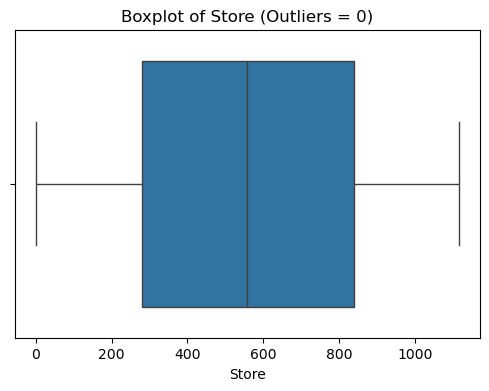

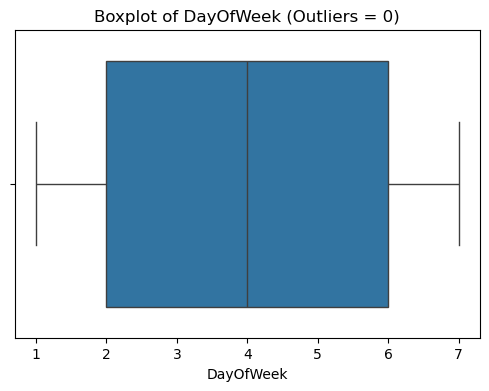

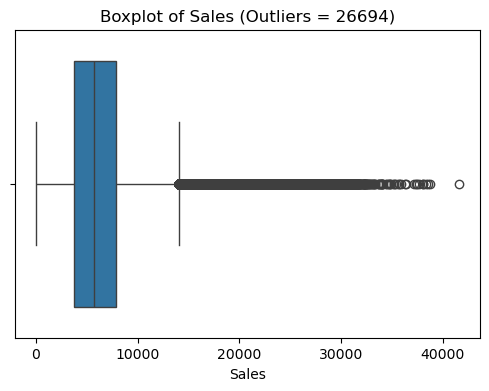

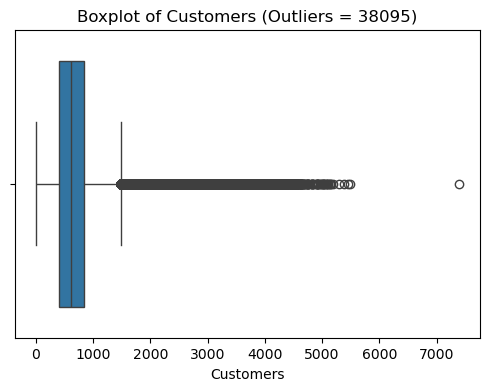

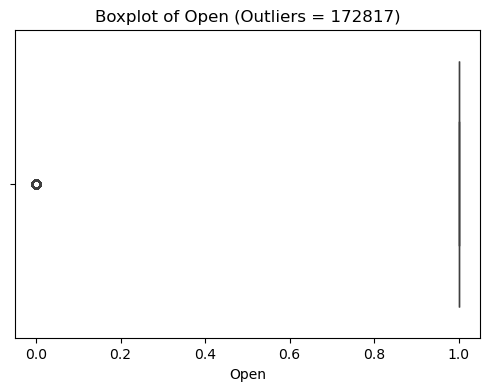

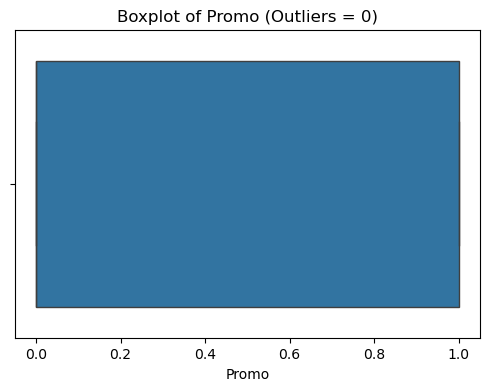

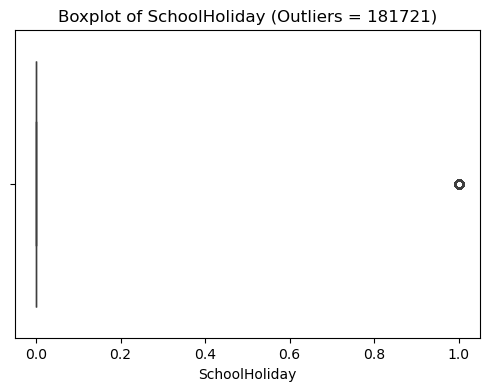

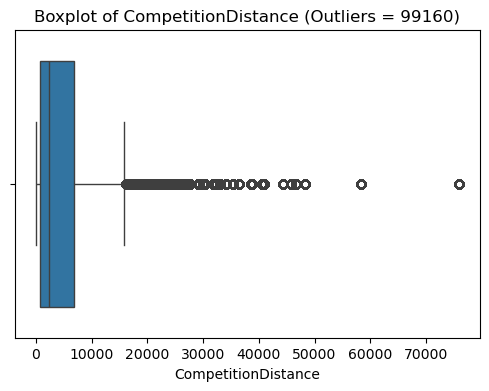

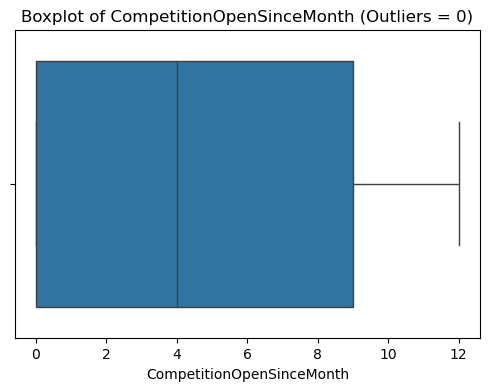

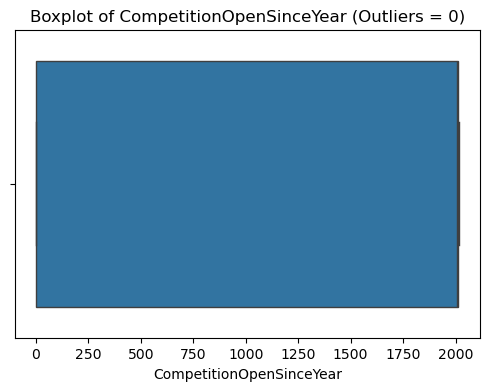

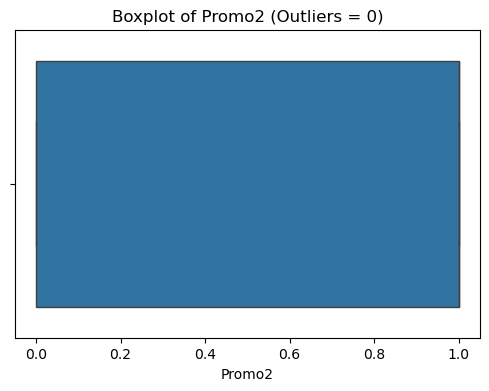

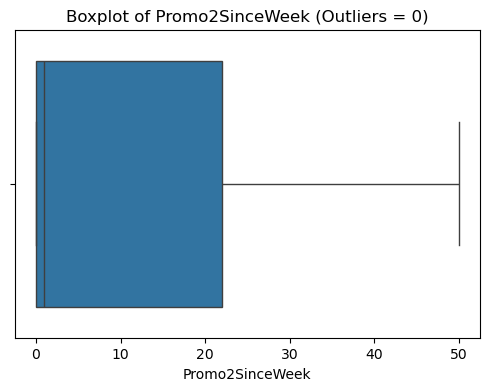

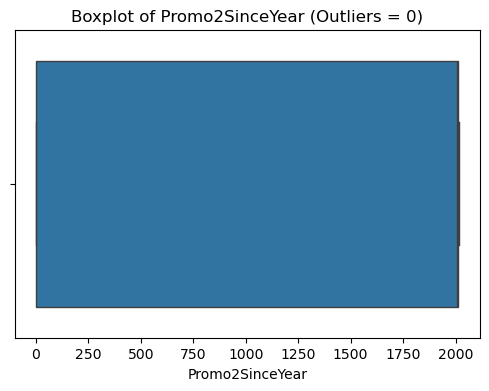

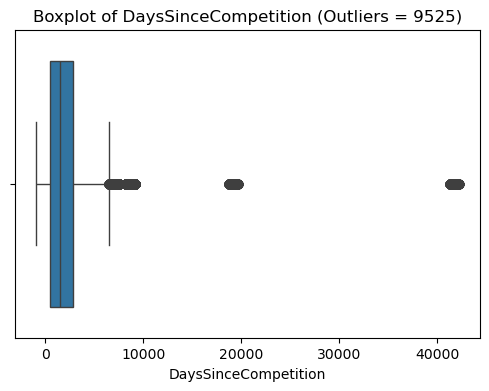

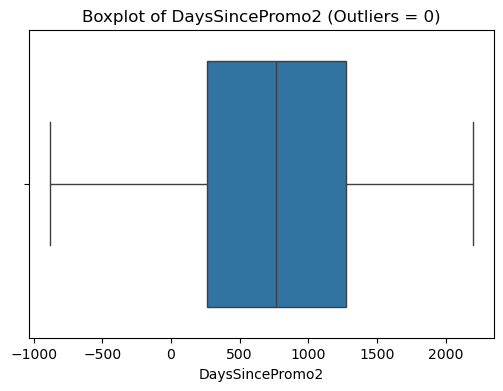


 Outlier Summary (All Numeric Columns):
Store: 0 outliers
DayOfWeek: 0 outliers
Sales: 26694 outliers
Customers: 38095 outliers
Open: 172817 outliers
Promo: 0 outliers
SchoolHoliday: 181721 outliers
CompetitionDistance: 99160 outliers
CompetitionOpenSinceMonth: 0 outliers
CompetitionOpenSinceYear: 0 outliers
Promo2: 0 outliers
Promo2SinceWeek: 0 outliers
Promo2SinceYear: 0 outliers
DaysSinceCompetition: 9525 outliers
DaysSincePromo2: 0 outliers


In [36]:
outlier_summary = detect_outliers_iqr(store_train)

- Sales (26,694 outliers)
These are days where sales were much higher or lower than usual.
This commonly happens during festivals, strong promotions, or unexpected low-traffic days.

- Customers (38,095 outliers)
Customer footfall varies a lot across stores and dates, which explains the high number of extreme values.

- Open (17,281 outliers)
These mostly represent days when stores were closed or partially open, which naturally creates extreme values.

- SchoolHoliday (181,721 outliers)
School holidays strongly affect shopping behavior, especially in family-dominated locations, leading to sharp changes in sales.

- CompetitionDistance (99,160 outliers)
Some stores have competitors very close by, while others are extremely far away.
This wide spread creates many extreme values.

- DaysSinceCompetition (9,525 outliers)
Some stores have had competition for many years, while others only recently faced competition.

In [37]:
store_train.to_csv("C:/NextHikes Solutions/Rossmann Store Sales/store_train.csv", index=False)
print("Saved store_train.csv")

Saved store_train.csv


- The processed and feature-engineered sales data is saved.

Promo fraction by year:
 Year
2013    0.369864
2014    0.381913
2015    0.400943
Name: Promo, dtype: float64


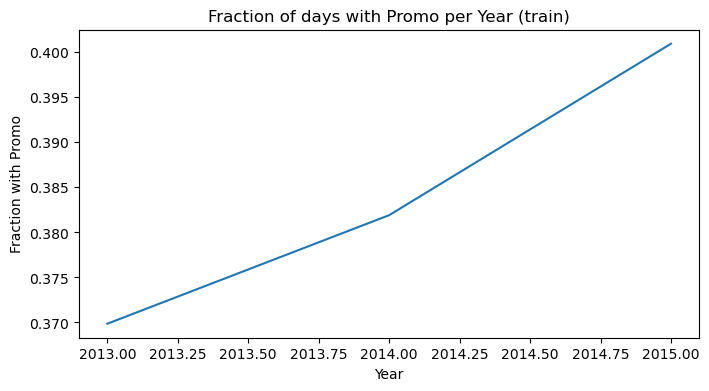

In [38]:
promo_dist = store_train.groupby('Year')['Promo'].mean()  
print("Promo fraction by year:\n", promo_dist)

plt.figure(figsize=(8,4))
plt.plot(promo_dist.index, promo_dist.values)
plt.title("Fraction of days with Promo per Year (train)")
plt.xlabel("Year")
plt.ylabel("Fraction with Promo")
plt.show()

- The fraction of days with promotions increases slightly every year.

Holiday Sales Summary:
                count         mean  median
StateHoliday                             
0             131072  5733.530624  5674.0
0             855087  5980.279717  5878.0
a              20260   290.735686     0.0
b               6690   214.311510     0.0
c               4100   168.733171     0.0


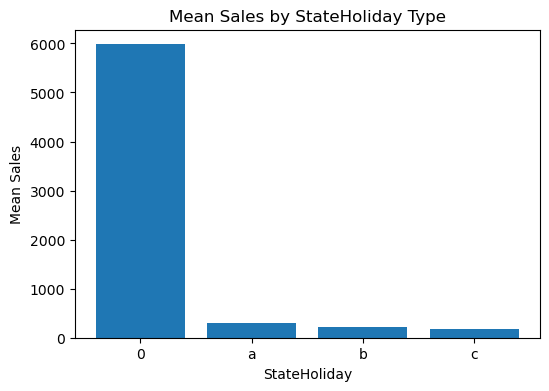

In [39]:
holiday_summary = store_train.groupby('StateHoliday')['Sales'].agg(['count','mean','median'])
print("Holiday Sales Summary:\n", holiday_summary)

plt.figure(figsize=(6,4))
plt.bar(holiday_summary.index.astype(str), holiday_summary['mean'])
plt.title("Mean Sales by StateHoliday Type")
plt.xlabel("StateHoliday")
plt.ylabel("Mean Sales")
plt.show()

- Sales are much lower on state holidays.
- Median sales are zero for some holiday types, showing that many stores remain closed.

School Holiday Sales Summary:
                 count         mean  median
SchoolHoliday                             
0              835488  5620.979034  5642.0
1              181721  6476.522207  6197.0


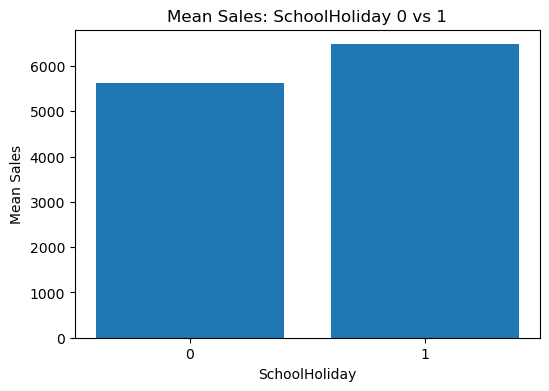

In [40]:
school_summary = store_train.groupby('SchoolHoliday')['Sales'].agg(['count','mean','median'])
print("School Holiday Sales Summary:\n", school_summary)

plt.figure(figsize=(6,4))
plt.bar(school_summary.index.astype(str), school_summary['mean'])
plt.title("Mean Sales: SchoolHoliday 0 vs 1")
plt.xlabel("SchoolHoliday")
plt.ylabel("Mean Sales")
plt.show()

- Sales are higher on school holidays compared to normal days.

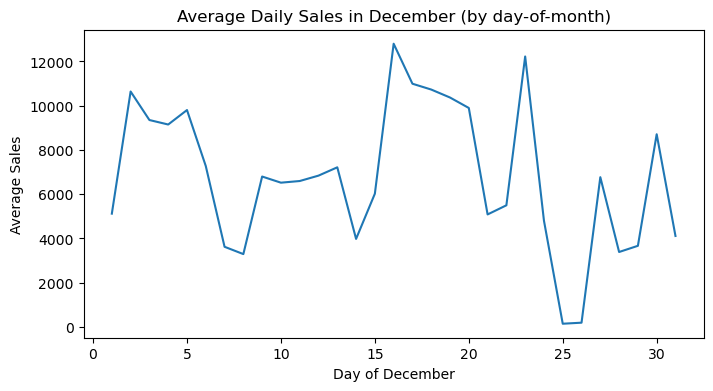

In [41]:
christmas_mask = store_train['Date'].dt.month == 12
dec_sales = store_train[christmas_mask].groupby(store_train['Date'].dt.day)['Sales'].mean()
plt.figure(figsize=(8,4))
plt.plot(dec_sales.index, dec_sales.values)
plt.title("Average Daily Sales in December (by day-of-month)")
plt.xlabel("Day of December")
plt.ylabel("Average Sales")
plt.show()

- Sales rise sharply in mid-December and drop around Christmas Day.

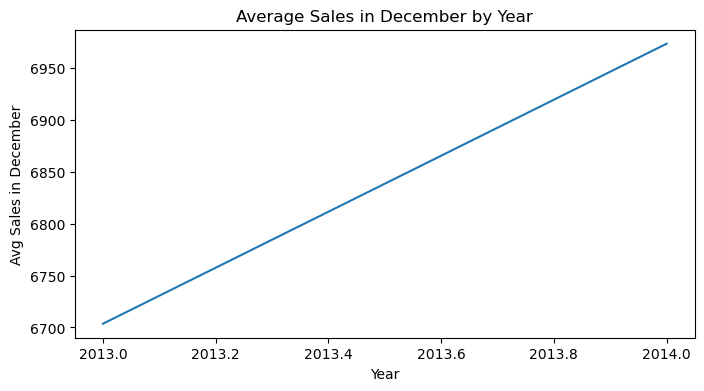

In [42]:
dec_by_year = store_train[store_train['Month']==12].groupby('Year')['Sales'].mean()
plt.figure(figsize=(8,4))
plt.plot(dec_by_year.index, dec_by_year.values)
plt.title("Average Sales in December by Year")
plt.xlabel("Year")
plt.ylabel("Avg Sales in December")
plt.show()

- Average December sales increased from one year to the next.

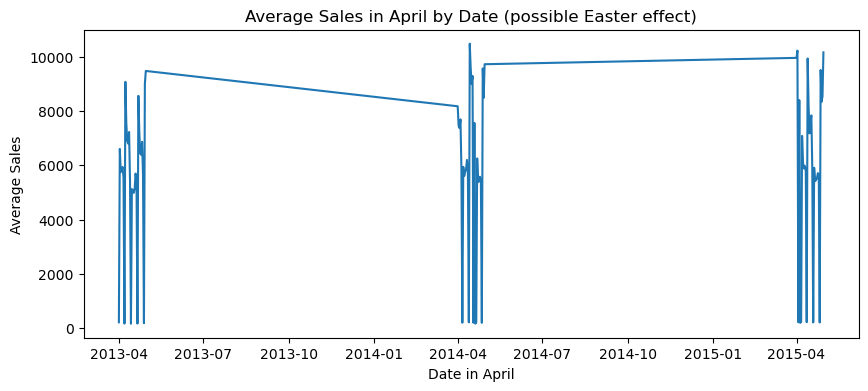

In [43]:
apr_sales = store_train[store_train['Month']==4].groupby('Date')['Sales'].mean()
plt.figure(figsize=(10,4))
plt.plot(apr_sales.index, apr_sales.values)
plt.title("Average Sales in April by Date (possible Easter effect)")
plt.xlabel("Date in April")
plt.ylabel("Average Sales")
plt.show()

- Sales fluctuate heavily in April.

Correlation (Sales, Customers): 0.8947107733016734


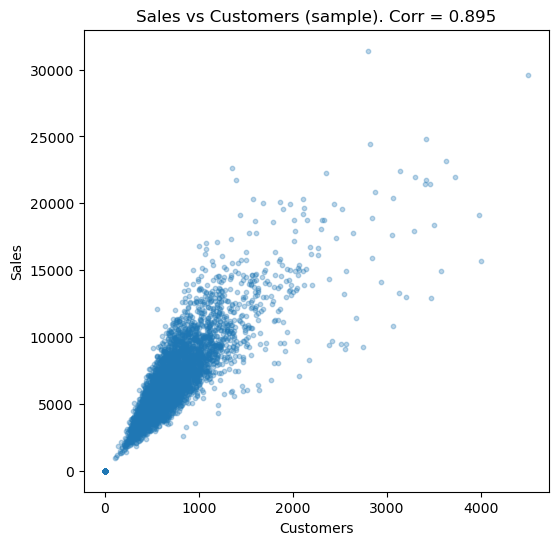

In [44]:
corr = store_train[['Sales','Customers']].corr().iloc[0,1]
print("Correlation (Sales, Customers):", corr)

plt.figure(figsize=(6,6))
plt.scatter(store_train['Customers'].sample(5000, random_state=1), store_train['Sales'].sample(5000, random_state=1), alpha=0.3, s=10)
plt.title(f"Sales vs Customers (sample). Corr = {corr:.3f}")
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

- There is a very strong positive correlation (~0.89) between customers and sales.
- As customer count increases, sales rise almost proportionally.

In [45]:
promo_effect = store_train.groupby('Promo').agg({
    'Sales': ['mean','median'],
    'Customers': ['mean','median'],
    'Store': 'count'
})
promo_effect.columns = ['_'.join(c).strip() for c in promo_effect.columns.values]
print("Promo effect summary:\n", promo_effect)

Promo effect summary:
         Sales_mean  Sales_median  Customers_mean  Customers_median  \
Promo                                                                
0      4406.050805        4622.0      517.823542             512.0   
1      7991.152046        7553.0      820.098815             747.0   

       Store_count  
Promo               
0           629129  
1           388080  


- On promotion days: Sales are much higher and Customer count increases significantly
- This confirms promotions are highly effective.

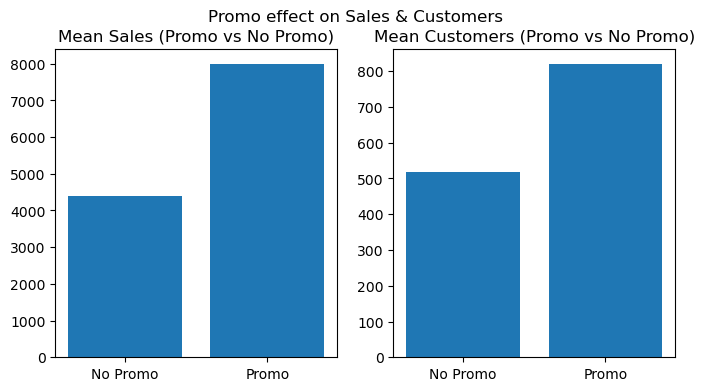

In [46]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.bar(['No Promo', 'Promo'], promo_effect['Sales_mean'].values)
plt.title("Mean Sales (Promo vs No Promo)")
plt.subplot(1,2,2)
plt.bar(['No Promo', 'Promo'], promo_effect['Customers_mean'].values)
plt.title("Mean Customers (Promo vs No Promo)")
plt.suptitle("Promo effect on Sales & Customers")
plt.show()

- Bar charts clearly show: Higher average sales during promotions and More customers during promotions.
- Promotions successfully boost both footfall and revenue.

Median SalesPerCustomer by Promo: Promo
0    8.741597
1    9.956947
Name: SalesPerCustomer, dtype: float64


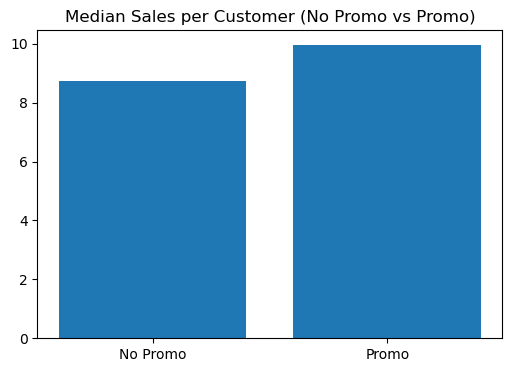

In [47]:
store_train['SalesPerCustomer'] = store_train['Sales'] / store_train['Customers'].replace({0:np.nan})
spc = store_train.groupby('Promo')['SalesPerCustomer'].median().fillna(0)
print("Median SalesPerCustomer by Promo:", spc)
plt.figure(figsize=(6,4))
plt.bar(['No Promo','Promo'], spc.values)
plt.title("Median Sales per Customer (No Promo vs Promo)")
plt.show()

- Median sales per customer are higher during promotions.

In [48]:
by_storetype = store_train.groupby(['StoreType','Promo']).agg({'Sales':'mean','Customers':'mean'}).reset_index()
pivot_storetype = by_storetype.pivot(index='StoreType', columns='Promo', values='Sales')
print("Average Sales by StoreType with/without Promo:\n", pivot_storetype)

Average Sales by StoreType with/without Promo:
 Promo                0             1
StoreType                           
a          4300.418175   8068.080939
b          9409.434791  11109.739497
c          4435.040156   7810.174738
d          4326.661817   7776.593414


- All store types show higher sales during promotions.

In [49]:
pivot_storetype['promo_lift'] = (pivot_storetype[1] - pivot_storetype[0]) / pivot_storetype[0]
pivot_storetype = pivot_storetype.sort_values('promo_lift', ascending=False)
print("Promo lift by StoreType:\n", pivot_storetype[['promo_lift']])

Promo lift by StoreType:
 Promo      promo_lift
StoreType            
a            0.876115
d            0.797366
c            0.761016
b            0.180702


- Store types a and d benefit the most from promotions.

In [50]:
store_level = store_train.groupby(['Store','Promo'])['Sales'].mean().unstack(fill_value=np.nan)
store_level['lift'] = (store_level[1] - store_level[0]) / store_level[0]
top_store_lift = store_level['lift'].dropna().sort_values(ascending=False).head(20)
print("Top stores by promo lift:\n", top_store_lift.head(10))

Top stores by promo lift:
 Store
198     2.258195
607     1.889831
543     1.759064
575     1.737234
271     1.620440
693     1.611931
96      1.575477
1108    1.567058
552     1.562815
635     1.559672
Name: lift, dtype: float64


- Some stores show extremely high lift, indicating promotions are very effective there.

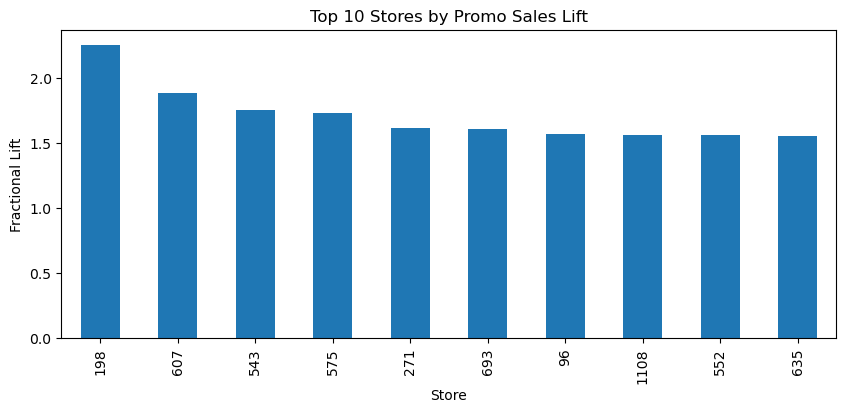

In [51]:
plt.figure(figsize=(10,4))
top_store_lift.head(10).plot(kind='bar')
plt.title("Top 10 Stores by Promo Sales Lift")
plt.ylabel("Fractional Lift")
plt.show()

- The bar chart highlights the top 10 stores where promotions generate the highest sales increase.

In [52]:
store_weekday_open = store_train[store_train['Open']==1].groupby('Store')['DayOfWeek'].nunique()
store_weekday_open = store_weekday_open.reset_index().rename(columns={'DayOfWeek':'open_weekdays_count'})
always_open_stores = store_weekday_open[store_weekday_open['open_weekdays_count'] == 7]['Store'].tolist()
print("Stores open all weekdays (count):", len(always_open_stores))

Stores open all weekdays (count): 33


- Only 33 stores remain open all 7 days of the week.

In [53]:
weekend_sales = store_train[store_train['IsWeekend']==1].groupby('Store')['Sales'].mean().reset_index()
weekend_sales = weekend_sales.merge(store_weekday_open, on='Store', how='left')
weekend_sales['always_open'] = weekend_sales['open_weekdays_count'] == 7
weekend_cmp = weekend_sales.groupby('always_open')['Sales'].mean()
print("Weekend sales: always_open vs not:\n", weekend_cmp)

Weekend sales: always_open vs not:
 always_open
False    2915.109089
True     6832.173348
Name: Sales, dtype: float64


- Stores open all weekdays earn significantly higher weekend sales compared to others.

Assortment sales summary:
              count         mean  median
Assortment                             
a           537445  5481.026096  5463.0
b             8294  8553.931999  8026.5
c           471470  6058.676567  6039.0


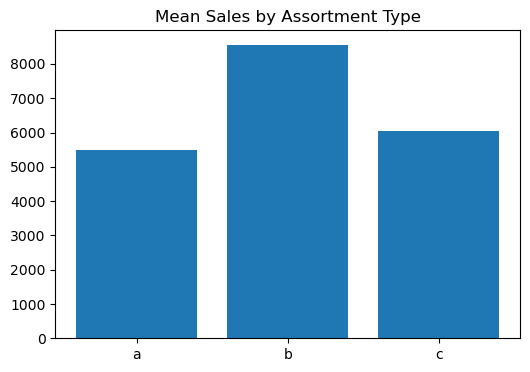

In [54]:
assort_summary = store_train.groupby('Assortment')['Sales'].agg(['count','mean','median'])
print("Assortment sales summary:\n", assort_summary)

plt.figure(figsize=(6,4))
plt.bar(assort_summary.index.astype(str), assort_summary['mean'])
plt.title("Mean Sales by Assortment Type")
plt.show()

- Assortment type b has the highest average and median sales.

In [55]:
with_comp_open = store_train[~store_train['CompetitionOpenSince'].isna()]
sample_store = None
if not with_comp_open.empty:
    sample_store = with_comp_open['Store'].iloc[0]
    s = store_train[store_train['Store'] == sample_store]
    comp_open_date = s['CompetitionOpenSince'].dropna().unique()
    if len(comp_open_date) > 0:
        comp_open_date = comp_open_date[0]
        before = s[s['Date'] < comp_open_date]['Sales'].mean()
        after  = s[s['Date'] >= comp_open_date]['Sales'].mean()
        print(f"Sample Store {sample_store} sales before comp open: {before}, after: {after}")

Sample Store 1 sales before comp open: nan, after: 3945.704883227176


- For a sample store, average sales are higher after competition opens.

In [56]:
print("\n=== Quick Insight Summary ===")
print(f"Corr(Sales,Customers) = {corr:.3f}")
print("Promo increases mean Sales and mean Customers (see promo_effect summary).")
print(f"Number of stores open all weekdays: {len(always_open_stores)}")
print("Competition distance shows relationship with sales in quantile bins (see plot).")
print("Holiday effects: December shows seasonal changes; school and state holidays change mean sales (see plots).")


=== Quick Insight Summary ===
Corr(Sales,Customers) = 0.895
Promo increases mean Sales and mean Customers (see promo_effect summary).
Number of stores open all weekdays: 33
Competition distance shows relationship with sales in quantile bins (see plot).
Holiday effects: December shows seasonal changes; school and state holidays change mean sales (see plots).


- This cell prints the final insights.

In [57]:
Test= pd.read_csv("C:/NextHikes Solutions/Rossmann Store Sales/test.csv")

- Test dataset is loaded.

In [58]:
Test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


- Few datapoints of Test dataset are printed.

In [59]:
store_test= pd.merge(Test, Store, on= 'Store', how= 'left')

- Test dataset is merged with store dataset on 'Store'.

In [60]:
store_test.shape

(41088, 17)

- There are 41088 rows and 17 columns in the merged dataset.

In [61]:
Test.shape

(41088, 8)

- There are 41088 rows and 8 columns in test dataset.

In [62]:
store_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- Merged dataset is printed.

In [63]:
store_test.describe

<bound method NDFrame.describe of           Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c     

- Description of merged dataset is printed.

In [64]:
store_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

- All the columns in merged dataset are printed.

In [65]:
store_test.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

- Datatypes of all columns in merged dataset.

In [66]:
store_test.info

<bound method DataFrame.info of           Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c       

- Detailed information of the merged dataset is printed.

In [67]:
store_test.isnull().sum()[store_test.isnull().sum()>0]

Open                            11
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

- Columns with null values and total null values in each column are printed.

In [68]:
CompetitionDistance_median= store_test['CompetitionDistance'].median()
CompetitionDistance_median

2425.0

- This cell calculates the median distance to the nearest competitor for stores in the test dataset.
- The median value comes out to 2425 meters

In [69]:
store_test['CompetitionOpenSinceMonth']= store_test['CompetitionOpenSinceMonth'].fillna(0)
store_test['CompetitionOpenSinceYear']= store_test['CompetitionOpenSinceYear'].fillna(0)

- Missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear are filled with 0

In [70]:
store_test['Promo2SinceWeek']= store_test['Promo2SinceWeek'].fillna(0)
store_test['Promo2SinceYear']= store_test['Promo2SinceYear'].fillna(0)
store_test['PromoInterval']= store_test['PromoInterval'].fillna('None')

- Missing values for Promo2SinceWeek and Promo2SinceYear are filled with 0.
- The PromoInterval column is filled with "None".

In [71]:
store_test['Open'] = store_test['Open'].fillna(1)

- Any missing values in the Open column are filled with 1.

In [72]:
store_test.isnull().sum()

Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                          0
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance          96
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
dtype: int64

- Total null values in all columns.

In [73]:
store_test['Date'] = pd.to_datetime(store_test['Date'])

- The Date column in the test data is converted into a proper datetime format.

In [74]:
def make_competition_date(row):
    y, m = row['CompetitionOpenSinceYear'], row['CompetitionOpenSinceMonth']
    if y == 0 or m == 0:
        return pd.NaT
    return pd.Timestamp(year=int(y), month=int(m), day=1)

store_test['CompetitionOpenSince'] = store_test.apply(make_competition_date, axis=1)

- This combines CompetitionOpenSinceYear and CompetitionOpenSinceMonth into a single date column called CompetitionOpenSince.

In [75]:
def make_promo2_date(row):
    y, w = row['Promo2SinceYear'], row['Promo2SinceWeek']
    if pd.isna(y) or pd.isna(w) or y == 0 or w == 0:
        return pd.NaT
    return pd.to_datetime(f'{int(y)}-{int(w)}-1', format='%G-%V-%u', errors='coerce')

store_test['Promo2Since'] = store_test.apply(make_promo2_date, axis=1)

- Promo2SinceYear and Promo2SinceWeek are converted into a real calendar date called Promo2Since.

In [76]:
store_test['Year'] = store_test['Date'].dt.year
store_test['Month'] = store_test['Date'].dt.month
store_test['Day'] = store_test['Date'].dt.day
store_test['WeekOfYear'] = store_test['Date'].dt.isocalendar().week.astype(int)
store_test['IsWeekend'] = store_test['DayOfWeek'].isin([6,7]).astype(int)

- Several new features are created from the Date column.

In [77]:
store_test['DaysSinceCompetition'] = (store_test['Date'] - store_test['CompetitionOpenSince']).dt.days
store_test['DaysSincePromo2'] = (store_test['Date'] - store_test['Promo2Since']).dt.days

- Two duration-based features are created:
- DaysSinceCompetition shows how many days have passed since a competitor opened nearby
- DaysSincePromo2 shows how long a store has been running Promo2

In [135]:
store_test.to_csv("C:/NextHikes Solutions/Rossmann Store Sales/store_test.csv", index=False)
print("Saved store_test.csv")

Saved store_test.csv


- The fully processed test dataset is saved as store_test.csv.

In [79]:
import os
import time
from datetime import datetime
import joblib

- Loads basic Python libraries.

In [80]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error
from sklearn.inspection import permutation_importance

- All core machine learning utilities are imported.

In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

- TensorFlow and Keras components are imported for deep learning models.

In [82]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("task2")

- Logging is enabled to track execution messages.
- A logger named “task2” is created so model steps and data size can be monitored clearly during training.

In [83]:
data = store_train.copy()
logger.info(f"Data shape: {data.shape}")

INFO:task2:Data shape: (1017209, 28)


- The training dataset is copied into a new variable called data.
- The log output shows the dataset contains 1,017,209 rows and 28 columns, confirming a large time-series dataset is being used for modeling.

In [84]:
numeric_features = [
    'CompetitionDistance', 'DaysSinceCompetition',
    'DaysSincePromo2'
]
numeric_features += ['Year','Month','Day','WeekOfYear','IsWeekend']

- Lists all numerical features used by the model.

In [85]:
categorical_features_train = [c for c in ['StoreType','Assortment','PromoInterval','MonthPeriod','DayOfWeek'] if c in store_train.columns]
numeric_features_train = [c for c in numeric_features if c in store_train.columns]

categorical_features_test = [c for c in ['StoreType','Assortment','PromoInterval','MonthPeriod','DayOfWeek'] if c in store_test.columns]
numeric_features_test = [c for c in numeric_features if c in store_test.columns]

logger.info("Numeric features: %s", numeric_features_train)
logger.info("Categorical features: %s", categorical_features_train)

logger.info("Numeric features: %s", numeric_features_test)
logger.info("Categorical features: %s", categorical_features_test)

INFO:task2:Numeric features: ['CompetitionDistance', 'DaysSinceCompetition', 'DaysSincePromo2', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend']
INFO:task2:Categorical features: ['StoreType', 'Assortment', 'PromoInterval', 'DayOfWeek']
INFO:task2:Numeric features: ['CompetitionDistance', 'DaysSinceCompetition', 'DaysSincePromo2', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend']
INFO:task2:Categorical features: ['StoreType', 'Assortment', 'PromoInterval', 'DayOfWeek']


- Prepares feature lists for modeling.

In [86]:
max_date_train = store_train['Date'].max()
max_date_test = store_test['Date'].max()
train_start = max_date_train - pd.Timedelta(days=42)
test_start = max_date_test - pd.Timedelta(days=42)
train_set = store_train[store_train['Date'] < train_start].copy()
test_set = store_test[store_test['Date'] >= test_start].copy()

- Creates a time-aware split instead of a random split.

In [87]:
store_train['CompetitionDistance'] = pd.to_numeric(
    store_train['CompetitionDistance'], errors='coerce'
)

store_test['CompetitionDistance'] = pd.to_numeric(
    store_test['CompetitionDistance'], errors='coerce'
)

- Converts CompetitionDistance into a numeric format.

In [88]:
for df_ in [store_train, store_test]:
    df_["StateHoliday"] = df_["StateHoliday"].astype(str)
    df_["StateHoliday"] = df_["StateHoliday"].replace("0", "None")

- The StateHoliday column is cleaned in both training and test data.

In [93]:
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_val[col] = X_val[col].astype(str)

- Ensures that all categorical columns in training and validation sets are treated as text.

In [94]:
logger.info(f"Train set: {store_train.shape}, Test set: {test_set.shape}, test_start: {test_start}")

INFO:task2:Train set: (1017209, 28), Test set: (36808, 26), test_start: 2015-08-06 00:00:00


- Prints dataset information.

In [92]:
from sklearn.model_selection import train_test_split

X = store_train.drop("Sales", axis=1)
y = store_train["Sales"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- Here, the data is split into:
- X → all columns except Sales
- y → the Sales column
- Then the training data is split into:
- 80% training
- 20% validation

In [95]:
missing_cols_in_test = set(X_train.columns) - set(X_val.columns)
for col in missing_cols_in_test:
    X_val[col] = 0 
missing_cols_in_train = set(X_val.columns) - set(X_train.columns)
for col in missing_cols_in_train:
    X_train[col] = 0

X_train = X_train.sort_index(axis=1)
X_val = X_val[X_train.columns]

print("✅ Train and Test are now aligned!")
print("Train shape:", X_train.shape)
print("Test shape:", X_val.shape)

✅ Train and Test are now aligned!
Train shape: (813767, 27)
Test shape: (203442, 27)


- Ensures both training and validation datasets have exactly the same columns.

In [96]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_train),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features_train),
    ]
)

- Defines how different types of sales data are prepared before going into the model.

In [90]:
numeric_features = [
    "Store",
    "DayOfWeek",
    "Open",
    "Promo",
    "SchoolHoliday",
    "Promo2",
    "CompetitionDistance",
    "CompetitionOpenSinceMonth",
    "CompetitionOpenSinceYear",
    "Promo2SinceWeek",
    "Promo2SinceYear",
    "Year",
    "Month",
    "Day",
    "WeekOfYear",
    "IsWeekend",
    "DaysSinceCompetition",
    "DaysSincePromo2"
]

categorical_features = [  
    "StateHoliday",
    "StoreType",      
    "Assortment",    
    "PromoInterval"   
]

- Lists which columns are treated as numeric and which are treated as categorical.

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

- Defines how raw store sales data is cleaned and prepared automatically before modeling.

In [98]:
# RandomForest Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

- Builds the final end-to-end sales prediction system.

In [99]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Store', 'DayOfWeek', 'Open',
                                                   'Promo', 'SchoolHoliday',
                                                   'Promo2',
                                                   'CompetitionDistance',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Promo2SinceWeek',
                                                   'Promo2SinceYear', 'Year',
                                                   'Month', 'Day', 'WeekOfYear',
                                                   'IsWeekend',
                                                   'DaysSinceCompetition',
                                                   'DaysSincePromo2']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['StateHoliday', 'StoreType',
                                                   'Assortment',
                                                   'PromoInterval'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, n_jobs=-1,
                                       random_state=42))])

- The model studies past store performance and learns how different conditions affected daily sales, so it can predict future sales realistically.

In [100]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

- Defines how prediction error is measured using RMSLE.

In [101]:
y_val_pred = pipeline.predict(X_val)

rmsle_val = rmsle(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print("RMSLE:", rmsle_val)
print("MSE:", mse_val)

RMSLE: 0.23583760470647216
MSE: 2358893.7760271872


- Checks how well the trained model performs on unseen data.
- An RMSLE of ~0.24 indicates reasonably accurate sales predictions.

In [102]:
logging.info("Training RandomForest pipeline...")
pipeline.fit(X_train, y_train)
logging.info("Model trained!")

INFO:root:Training RandomForest pipeline...
INFO:root:Model trained!


- This step marks the point where the model is ready for analysis or deployment.

In [103]:
numeric_features_train = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features_train = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend', 'DaysSinceCompetition', 'DaysSincePromo2']
Categorical features: ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


- The data clearly separates measurable quantities from store characteristics.
- This separation is important because: Numbers are scaled and Categories are converted into machine-readable form.
- It ensures the model treats store behavior and calendar effects correctly.

In [104]:
print("X_train shape:", X_train.shape)
print("X_train columns:", list(X_train.columns))

print("\nNumeric features:", numeric_features)
print("\nCategorical features:", categorical_features)

X_train shape: (813767, 27)
X_train columns: ['Assortment', 'CompetitionDistance', 'CompetitionOpenSince', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Customers', 'Date', 'Day', 'DayOfWeek', 'DaysSinceCompetition', 'DaysSincePromo2', 'IsWeekend', 'Month', 'Open', 'Promo', 'Promo2', 'Promo2Since', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'SalesPerCustomer', 'SchoolHoliday', 'StateHoliday', 'Store', 'StoreType', 'WeekOfYear', 'Year']

Numeric features: ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend', 'DaysSinceCompetition', 'DaysSincePromo2']

Categorical features: ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


- The model is trained on over 8 lakh sales records
- All important columns are present and aligned
- There is no mismatch between features and labels

In [105]:
missing_numeric = [col for col in numeric_features if col not in X_train.columns]
missing_categorical = [col for col in categorical_features if col not in X_train.columns]

print("\nMissing numeric:", missing_numeric)
print("Missing categorical:", missing_categorical)


Missing numeric: []
Missing categorical: []


- Checks if any expected features are missing.

In [106]:
numeric_features_train = [col for col in numeric_features if col != "Customers"]

- Customers is removed from numeric features.

In [107]:
for col in X_train.select_dtypes(include=['int64']).columns:
    X_train[col] = X_train[col].astype('int32')

for col in X_train.select_dtypes(include=['float64']).columns:
    X_train[col] = X_train[col].astype('float32')

- Data types are optimized:

Integers → int32

Floats → float32

In [108]:
feature_names_num = numeric_features
feature_names_cat = pipeline.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .named_steps["encoder"] \
    .get_feature_names_out(categorical_features)

all_features = np.concatenate([feature_names_num, feature_names_cat])

importances = pipeline.named_steps["model"].feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(10)

,feature,importance
2,Open,0.555757
3,Promo,0.088786
6,CompetitionDistance,0.074538
0,Store,0.054673
1,DayOfWeek,0.027483
8,CompetitionOpenSinceYear,0.027151
7,CompetitionOpenSinceMonth,0.024874
10,Promo2SinceYear,0.022120
23,StoreType_b,0.016926
16,DaysSinceCompetition,0.016219


- Top drivers of sales are:

Store open or closed

Promo

Competition distance

Store ID

Day of week

In [109]:
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
model_path = f"rf_sales_model_{timestamp}.pkl"

joblib.dump(pipeline, model_path)
print("Model saved:", model_path)

Model saved: rf_sales_model_19-12-2025-13-00-44.pkl


- This safely stores the final trained sales prediction model so it can be reused later for deployment or future predictions.

In [110]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

- Time-series and scaling libraries are imported.

In [111]:
store_ts = store_train[store_train["Store"] == 1][["Date", "Sales"]]
store_ts = store_ts.sort_values("Date").set_index("Date")

- This converts daily sales of a single store into a proper time-series format, where sales are tracked day by day.

In [112]:
result = adfuller(store_ts["Sales"])
print("ADF p-value:", result[1])

ADF p-value: 0.00033788346141425216


- The p-value is very small (≈ 0.0003), which means sales data is stationary.

In [113]:
store_ts["Sales_diff"] = store_ts["Sales"].diff().dropna()

- This captures how much sales changed from one day to the next, which helps models learn trends and fluctuations.

In [114]:
def create_sequences(data, window=14):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

- Each prediction will be based on the previous 14 days of sales, which mimics how real sales patterns evolve over time.

In [115]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_sales = scaler.fit_transform(store_ts[["Sales"]])

X_seq, y_seq = create_sequences(scaled_sales)

- Sales values are scaled between -1 and 1, and sequential training data is created.

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

- The required deep learning libraries are imported.

In [117]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_seq.shape[1], 1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_seq, y_seq, epochs=20, batch_size=32)

C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.1735
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1604
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1473
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1340
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1185
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1111
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1142
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0971
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0900
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0885
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0906
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0885
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0964
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0848
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0934
Epoc

- An LSTM-based neural network is created and trained on historical sales sequences.

In [118]:
import mlflow
import mlflow.sklearn

mlflow.start_run()
mlflow.sklearn.log_model(pipeline, "rf_model")
mlflow.log_metric("rmsle", rmsle_val)
mlflow.end_run()

2025/12/19 13:01:26 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/12/19 13:01:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/19 13:02:10 WARNING mlflow.models.model: Model logged without a signature and input exam

- This cell uses MLflow to track the trained model and its performance.

The trained Random Forest sales model is logged

The RMSLE score is also saved

The run is started and closed properly so results are stored

In [119]:
import streamlit as st
import pandas as pd
import joblib

st.title("Rossmann Store Sales Prediction")

model = joblib.load("rf_sales_model_19-12-2025-11-39-25.pkl")

uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    df["Date"] = pd.to_datetime(df["Date"])
    df["DayOfWeek"] = df["Date"].dt.dayofweek + 1
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year
    df["IsWeekend"] = df["DayOfWeek"].isin([6,7]).astype(int)

    X_input = df.drop("Date", axis=1)

    predictions = model.predict(X_input)
    df["Predicted_Sales"] = predictions

    st.line_chart(df["Predicted_Sales"])
    st.dataframe(df)

    st.download_button(
        "Download Predictions",
        df.to_csv(index=False),
        "predictions.csv",
        "text/csv"
    )

2025-12-19 13:02:18.492 
  command:

    streamlit run C:\Users\ALANKAR\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


- Creates a web app using Streamlit to predict Rossmann store sales.

In [133]:
import os

model_path = r"C:\NextHikes Solutions\Rossmann Store Sales\rf_sales_model_19-12-2025-11-39-25.pkl"

joblib.dump(pipeline, model_path, compress=2)

print("Model saved at:", model_path)

Model saved at: C:\NextHikes Solutions\Rossmann Store Sales\rf_sales_model_19-12-2025-11-39-25.pkl


- The trained sales prediction model is saved safely to disk.

In [132]:
st.title("Rossmann Store Sales Prediction")

model = joblib.load("rf_sales_model_19-12-2025-11-39-25.pkl")

uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    preds = model.predict(df)
    df["Predicted_Sales"] = preds
    st.dataframe(df)

    st.download_button(
        "Download Predictions",
        df.to_csv(index=False),
        "predictions.csv",
        "text/csv"
    )

- Runs a Streamlit web app that uses the saved model to predict store sales.

In [122]:
#http://localhost:8501/

- Link for the streamlit web app.

In [126]:
#cd "C:\NextHikes Solutions\Rossmann Store Sales"
#streamlit run app.py